![image.png](https://th.thgim.com/opinion/op-ed/x9sol6/article29451786.ece/ALTERNATES/FREE_660/Fake-news)


Hi, in this project we will classifying news on wheather it is reliable(0) or unreliable(1) using Fake News Dataset from [kaggle](https://www.kaggle.com/c/fake-news/data?select=train.csv)

## **Let's start by installing required libraries**

In [1]:
!pip install  pandas numpy seaborn matplotlib nltk  --quiet --upgrade

## **Loading and preparing the dataset for EDA and Training**

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('../Dataset/fake-news/train.csv')
test_df = pd.read_csv('../Dataset/fake-news/test.csv')
submit_df = pd.read_csv('../Dataset/fake-news/submit.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [6]:
submit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      5200 non-null   int64
 1   label   5200 non-null   int64
dtypes: int64(2)
memory usage: 81.4 KB


## **Exploratory Data Analysis**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 15
matplotlib.rcParams['figure.figsize']= (10, 5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
train_df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1



 ## **Note:**
*In order to give more edge over performance to our model specially when using textual features we remove less meaningful data like stopwords(is,a), punctuations,white space and also do lower casing , assign a unique number to a word (tokeniztion) and soo much more in preprocessing step*

*But before that let's explore the less meaningful data*

## **Number of words in each text**

In [10]:
train_df['Word Count'] = train_df['text'].apply(lambda x: len(str(x).split(' '))) 

In [11]:
train_df[['text','Word Count']].head(5) #word count also includes stop words here

,text,Word Count
0,House Dem Aide: We Didn’t Even See Comey’s Let...,820
1,Ever get the feeling your life circles the rou...,727
2,"Why the Truth Might Get You Fired October 29, ...",1266
3,Videos 15 Civilians Killed In Single US Airstr...,559
4,Print \nAn Iranian woman has been sentenced to...,154


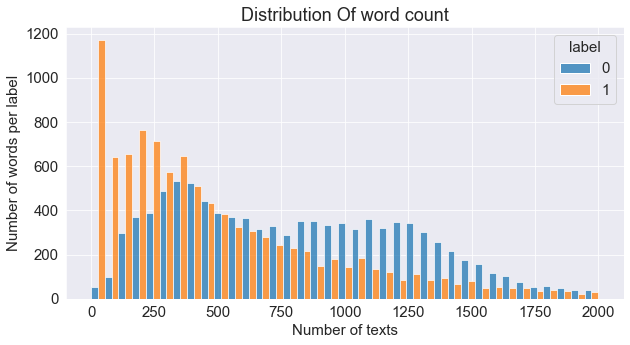

In [12]:
sns.histplot(x='Word Count',data=train_df,hue='label',binrange=[0,2000],multiple='dodge')
plt.ylabel('Number of words per label')
plt.title('Distribution Of word count')
plt.xlabel('Number of texts');



*   The distribution of number of words in a text is not normal before preprocessing
*   The number of words in unreliable(1) text are more than compared to number of words in reliable(0) text
*   Distribution of reliable text looks somewhat even



## **Number of stop words**

In [13]:
import nltk


In [14]:
from nltk.corpus import stopwords

In [15]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop = stopwords.words('english')

In [17]:
train_df['Stop Words Count'] = train_df['text'].apply(lambda x:len([x for x in str(x).split() if x in stop]))

In [18]:
train_df.head(5)

,id,title,author,text,label,Word Count,Stop Words Count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,820,322
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,727,286
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1266,493
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,559,212
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,154,58


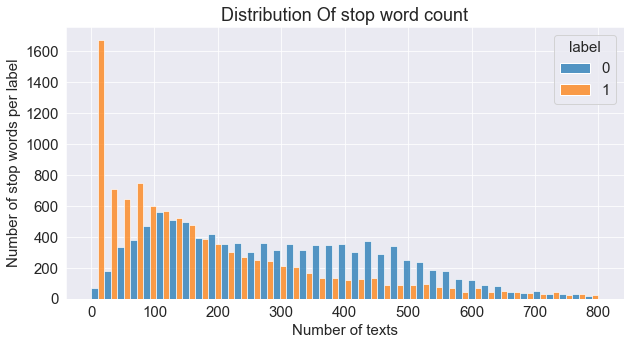

In [19]:
sns.histplot(x=train_df['Stop Words Count'],data=train_df,hue='label',binrange=[0,800],multiple='dodge')
plt.ylabel('Number of stop words per label')
plt.title('Distribution Of stop word count')
plt.xlabel('Number of texts');



*   Same trend as words count can be observed stop words count that is uneven distribution for 400+ unreliable texts and a little even distribution for reliable  600+ texts 



**Average number of words in a single text**

In [20]:
def avg_word(text):
  total_words = str(text).split(' ')
  return (sum( len(word) for word in total_words)/len(total_words)) 

In [21]:
train_df['Avg words count'] = train_df['text'].apply(lambda x:avg_word(x))

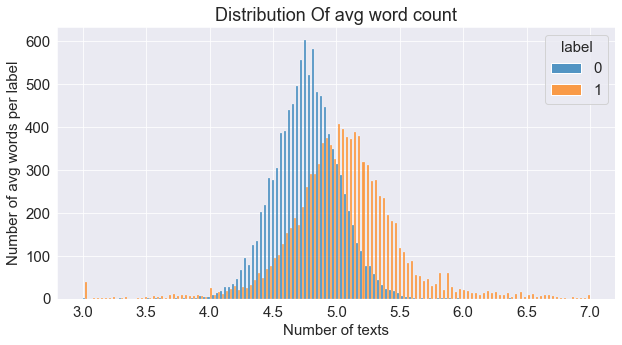

In [22]:
sns.histplot(x=train_df['Avg words count'],data=train_df,hue='label',binrange=[3,7],multiple='dodge')
plt.ylabel('Number of avg words per label')
plt.title('Distribution Of avg word count')
plt.xlabel('Number of texts');


*   The average number of words in a single text in both reliable and unreliable text are distibuted normally

*   However the number avg words in reliable texts is greater than number of unreliable texts



In [23]:
print('Average Number of Stop words per:',train_df['Stop Words Count'].mean())
print('Average Number of words:',train_df['Word Count'].mean())
print('Average Number of words per label:',train_df['Avg words count'].mean())


Average Number of Stop words per: 283.2744230769231
Average Number of words: 773.2021634615385
Average Number of words per label: 4.927379842198304


In [24]:
pre = {
        'avg_stop_words': [train_df['Stop Words Count'].mean()],
        'avg_words' : [train_df['Word Count'].mean()],
        'avg_words ' : [train_df['Avg words count'].mean()],
        'Preprocessed' : False
    }

In [25]:
pre

{'avg_stop_words': [283.2744230769231],
 'avg_words': [773.2021634615385],
 'avg_words ': [4.927379842198304],
 'Preprocessed': False}

In [26]:
preprocess_df = pd.DataFrame(pre)

In [27]:
preprocess_df

,avg_stop_words,avg_words,avg_words,Preprocessed
0,283.274423,773.202163,4.92738,False


## **Preprocessing Text Data**

Before diving into text and feature extraction, our first step should be cleaning the data in order to obtain better features, to compare data before and after preprocessing we will be doing both steps

## **Lower Casing**


In [28]:
train_df['text'] = train_df['text'].apply(lambda x:str(x).lower())

In [29]:
train_df.text.head(5)

0    house dem aide: we didn’t even see comey’s let...
1    ever get the feeling your life circles the rou...
2    why the truth might get you fired october 29, ...
3    videos 15 civilians killed in single us airstr...
4    print \nan iranian woman has been sentenced to...
Name: text, dtype: object

## **Remove punctuations**

In [30]:
train_df['text'] = train_df['text'].str.replace('[^\w\s]' ,' ')

<ipython-input-30-e443c5ad3081>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['text'] = train_df['text'].str.replace('[^\w\s]' ,' ')


In [31]:
train_df.text.head()

0    house dem aide  we didn t even see comey s let...
1    ever get the feeling your life circles the rou...
2    why the truth might get you fired october 29  ...
3    videos 15 civilians killed in single us airstr...
4    print \nan iranian woman has been sentenced to...
Name: text, dtype: object

## **Removing stop words**

In [32]:
train_df['text'] = train_df.text.apply(lambda x:' '.join(x for x in str(x).split() if x not in stop))

In [33]:
train_df.text.head(5)

0    house dem aide even see comey letter jason cha...
1    ever get feeling life circles roundabout rathe...
2    truth might get fired october 29 2016 tension ...
3    videos 15 civilians killed single us airstrike...
4    print iranian woman sentenced six years prison...
Name: text, dtype: object

## **Removing top 10 Common words**

In [34]:
freq  = pd.Series(' '.join(train_df['text']).split()).value_counts()[:10]

In [35]:
freq

said       80054
mr         66287
trump      56258
one        38651
would      37358
people     36540
new        30056
clinton    27399
like       26341
also       25448
dtype: int64

In [36]:
train_df['text'] = train_df.text.apply(lambda x:' '.join(x for x in str(x).split() if x not in freq))

In [37]:
train_df.text.head(5)

0    house dem aide even see comey letter jason cha...
1    ever get feeling life circles roundabout rathe...
2    truth might get fired october 29 2016 tension ...
3    videos 15 civilians killed single us airstrike...
4    print iranian woman sentenced six years prison...
Name: text, dtype: object

## **Removing Rarely occuring words**

In [38]:
freq  = pd.Series(' '.join(train_df['text']).split()).value_counts()[-20:]

In [39]:
freq

предоставил        1
lesean             1
jantar             1
mantar             1
прибывшие          1
deth               1
stamol             1
kopitarna          1
popadic            1
kozole             1
планирование       1
kruhek             1
srecko             1
pomsel             1
brunhilde          1
412th              1
therock            1
justice4assange    1
ohn                1
gennette           1
dtype: int64

In [40]:
rare_freq = freq[-30:]

In [41]:
train_df['text'] = train_df.text.apply(lambda x:' '.join(x for x in str(x).split() if x not in rare_freq))

In [42]:
train_df.head(5)

,id,title,author,text,label,Word Count,Stop Words Count,Avg words count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide even see comey letter jason cha...,1,820,322,5.013415
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get feeling life circles roundabout rathe...,0,727,286,4.723521
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,truth might get fired october 29 2016 tension ...,1,1266,493,5.076619
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed single us airstrike...,1,559,212,4.792487
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenced six years prison...,1,154,58,5.097403


## **Let's now compare the data after preprocessing**

In [43]:
train_df['Word Count'] = train_df['text'].apply(lambda x: len(str(x).split(' '))) 

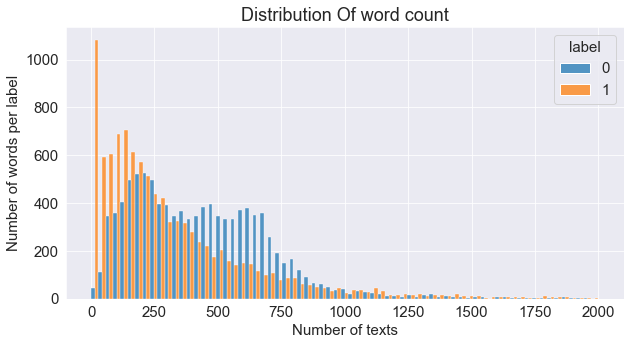

In [44]:
sns.histplot(x='Word Count',data=train_df,hue='label',binrange=[0,2000],multiple='dodge')
plt.ylabel('Number of words per label')
plt.title('Distribution Of word count')
plt.xlabel('Number of texts');

In [45]:
train_df['Stop Words Count'] = train_df['text'].apply(lambda x:len([x for x in str(x).split() if x in stop]))

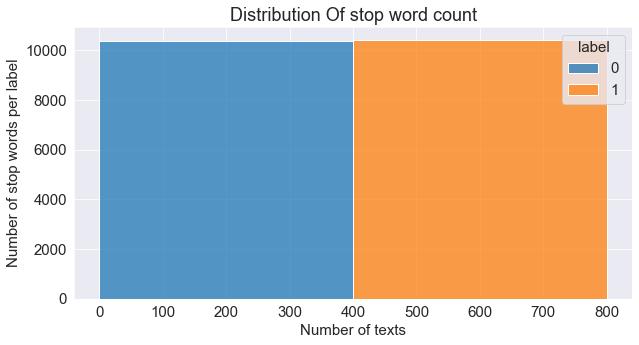

In [46]:
sns.histplot(x=train_df['Stop Words Count'],data=train_df,hue='label',binrange=[0,800],multiple='dodge')
plt.ylabel('Number of stop words per label')
plt.title('Distribution Of stop word count')
plt.xlabel('Number of texts');

In [47]:
train_df['Avg words count'] = train_df['text'].apply(lambda x:avg_word(x))

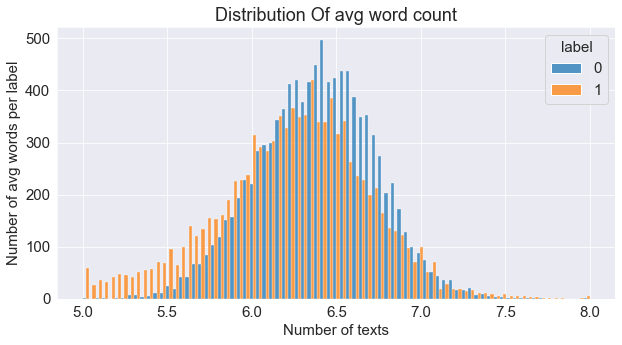

In [48]:
sns.histplot(x=train_df['Avg words count'],data=train_df,hue='label',binrange=[5,8],multiple='dodge')
plt.ylabel('Number of avg words per label')
plt.title('Distribution Of avg word count')
plt.xlabel('Number of texts');

In [49]:
post = {
        'avg_stop_words': [train_df['Stop Words Count'].mean()],
        'avg_words' : [train_df['Word Count'].mean()],
        'avg_words ' : [train_df['Avg words count'].mean()],
        'Preprocessed' : True
    }

In [50]:
preprocess_df.append(pd.DataFrame(post),ignore_index=True)

,avg_stop_words,avg_words,avg_words,Preprocessed
0,283.274423,773.202163,4.927380,False
1,0.000000,411.828894,6.265363,True


## **After Preprocessing**

*   The distribution of words per label remains same but we have decreased the count for unreliable new to 1000
*   The unnecessary information or less meaningful data like stop words have been removed which results in 2 separate bar each for unreliable and reliable news
*   The distribution of average number of words per text is almost normal and same for all the texts



In [51]:
!pip install wordcloud --quiet

In [52]:
train_df['text'][:500]

0      house dem aide even see comey letter jason cha...
1      ever get feeling life circles roundabout rathe...
2      truth might get fired october 29 2016 tension ...
3      videos 15 civilians killed single us airstrike...
4      print iranian woman sentenced six years prison...
                             ...                        
495    contaminated food china entering u organic lab...
496    bookshop website grand books editor aaron hick...
497    scandal epa could issued emergency order 7 mon...
498    wikileak email released monday reveals staffer...
499    أوروبا وخيار القوة في مواجهة اللاجئين تاريخ ال...
Name: text, Length: 500, dtype: object

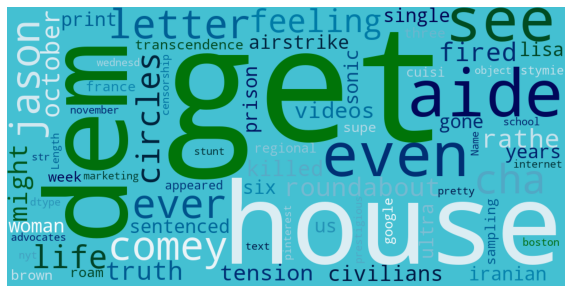

In [53]:
stopwords = set(stopwords.words("english"))
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords, 
                      max_words=100,background_color='#44C0D2', 
                      colormap="ocean",  random_state=10).generate(str(train_df['text'][:20000]))
plot_cloud(wordcloud)

*The above plot or image , as many of you may know it, is called a word cloud*
A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

# **Identifying Input and Target Columns**

**In this project we will just using the text data to train our models**

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20800 non-null  int64  
 1   title             20242 non-null  object 
 2   author            18843 non-null  object 
 3   text              20800 non-null  object 
 4   label             20800 non-null  int64  
 5   Word Count        20800 non-null  int64  
 6   Stop Words Count  20800 non-null  int64  
 7   Avg words count   20800 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.3+ MB


In [55]:
train_df.shape

(20800, 8)

In [56]:
input_cols = ['text']

In [57]:
target_col = 'label'

In [58]:
inputs = train_df[input_cols].copy()
targets = train_df[target_col].copy()

In [59]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\archa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
#Building corpus out of text data takes a lot of time, I have build the corpus and stored in pickle file
#so simply read from the same 

# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()
# import re

# corpus = []
# for i in range(0, len(train_df)):
#     review = re.sub('[^a-zA-Z]', ' ', str(train_df['text'][i]))

#     #review = str(train_df['text'][i]).replace('[^\w\s]' ,' ')

#     review = review.lower()
#     review = review.split()

#     review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)

In [61]:
import pickle

# with open('outfile', 'wb') as fp:
#     pickle.dump(corpus, fp)

In [62]:
with open ('outfile', 'rb') as fp:
    corpus = pickle.load(fp)

In [63]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter ch

## **Bag of words**

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
bow = CountVectorizer(max_features=6000,analyzer='word',ngram_range=(1,2))

In [66]:
X = bow.fit_transform(corpus).toarray()

In [67]:
y = train_df[['label']].iloc[:,-1]

## **Train Test Validation Splits**

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
len(list(bow.get_feature_names_out()))

6000

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## **Logistic Regression**

*Logistic regression is a classification algorithm used to find the probability of event success and event failure. It is used when the dependent variable is binary(0/1, True/False, Yes/No) in nature. It supports categorizing data into discrete classes by studying the relationship from a given set of labelled data*

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression(random_state=42,solver='newton-cg',n_jobs=-1)

In [74]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42, solver='newton-cg')

In [75]:
test_preds = model.predict(X_test)

In [76]:
accuracy_score(test_preds, y_test)

0.9513403263403264

In [77]:
print(classification_report(test_preds, y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3332
           1       0.96      0.94      0.95      3532

    accuracy                           0.95      6864
   macro avg       0.95      0.95      0.95      6864
weighted avg       0.95      0.95      0.95      6864



In [78]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [79]:
performance_df = pd.DataFrame({
    'model': ['LogisticRegression'],
    'accuracy_score': [accuracy_score(test_preds, y_test)],
    'recall_score': [recall_score(test_preds, y_test)],
    'precision_score': [precision_score(test_preds, y_test)],
    'f1_score': [f1_score(test_preds, y_test)],
})

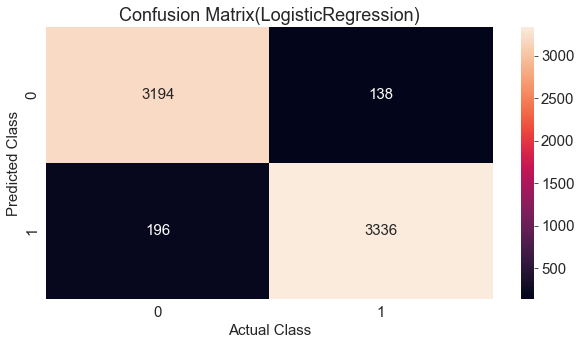

In [80]:
sns.heatmap(confusion_matrix(test_preds,y_test),annot=True,fmt='d');
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix(LogisticRegression)');

## **Passive-Aggressive classifiers**
*Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once.*

*This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example*

https://www.geeksforgeeks.org/passive-aggressive-classifiers/

In [81]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [82]:
from sklearn.metrics import classification_report, accuracy_score

In [83]:
model = PassiveAggressiveClassifier(random_state=42)

In [84]:
model.fit(X_train, y_train)

PassiveAggressiveClassifier(random_state=42)

In [85]:
test_preds = model.predict(X_test)

In [86]:
accuracy_score(test_preds, y_test)

0.9423076923076923

In [87]:
print(classification_report(test_preds, y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3342
           1       0.95      0.94      0.94      3522

    accuracy                           0.94      6864
   macro avg       0.94      0.94      0.94      6864
weighted avg       0.94      0.94      0.94      6864



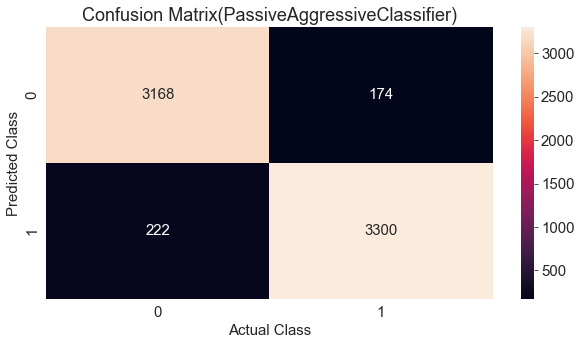

In [88]:
sns.heatmap(confusion_matrix(test_preds,y_test),annot=True,fmt='d');
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix(PassiveAggressiveClassifier)');

In [89]:
performance = {
    'model': ['PassiveAggressiveClassifier'],
    'accuracy_score': [accuracy_score(test_preds, y_test)],
    'recall_score': [recall_score(test_preds, y_test)],
    'precision_score': [precision_score(test_preds, y_test)],
    'f1_score': [f1_score(test_preds, y_test)],
}

In [90]:
performance_df = performance_df.append(pd.DataFrame(performance),ignore_index=False)

## **K-nearest neighbors**

*K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.*

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
model = KNeighborsClassifier(n_neighbors=3)

In [93]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [94]:
test_preds = model.predict(X_test)

In [95]:
accuracy_score(test_preds, y_test)

0.7964743589743589

In [96]:
performance = {
    'model': ['KNeighborsClassifier'],
    'accuracy_score': [accuracy_score(test_preds, y_test)],
    'recall_score': [recall_score(test_preds, y_test)],
    'precision_score': [precision_score(test_preds, y_test)],
    'f1_score': [f1_score(test_preds, y_test)],
}


In [97]:
performance_df = performance_df.append(pd.DataFrame(performance),ignore_index=True)

In [98]:
print(classification_report(test_preds, y_test))

              precision    recall  f1-score   support

           0       0.64      0.92      0.76      2363
           1       0.95      0.73      0.82      4501

    accuracy                           0.80      6864
   macro avg       0.79      0.83      0.79      6864
weighted avg       0.84      0.80      0.80      6864



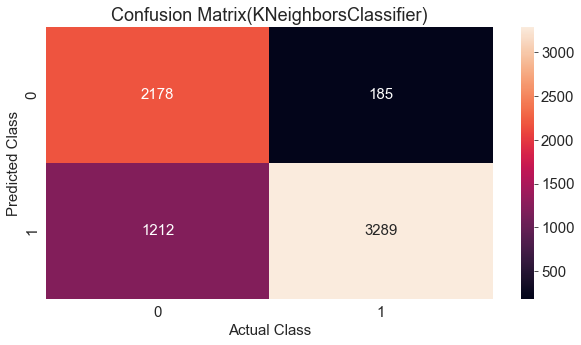

In [99]:
sns.heatmap(confusion_matrix(test_preds,y_test),annot=True,fmt='d');
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix(KNeighborsClassifier)');

## **Random Forest Classifier**

*The Random forest or Random Decision Forest is a supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees.*

*The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.*

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
model = RandomForestClassifier(random_state=42,n_jobs=-1)

In [102]:
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [103]:
test_preds = model.predict(X_test)

In [104]:
performance = {
    'model': ['RandomForestClassifier'],
    'accuracy_score': [accuracy_score(test_preds, y_test)],
    'recall_score': [recall_score(test_preds, y_test)],
    'precision_score': [precision_score(test_preds, y_test)],
    'f1_score': [f1_score(test_preds, y_test)],
}

In [105]:
performance_df = performance_df.append(pd.DataFrame(performance),ignore_index=True)

In [106]:
accuracy_score(test_preds, y_test)

0.9376456876456877

In [107]:
print(classification_report(test_preds,y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3402
           1       0.94      0.94      0.94      3462

    accuracy                           0.94      6864
   macro avg       0.94      0.94      0.94      6864
weighted avg       0.94      0.94      0.94      6864



In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
model.classes_

array([0, 1], dtype=int64)

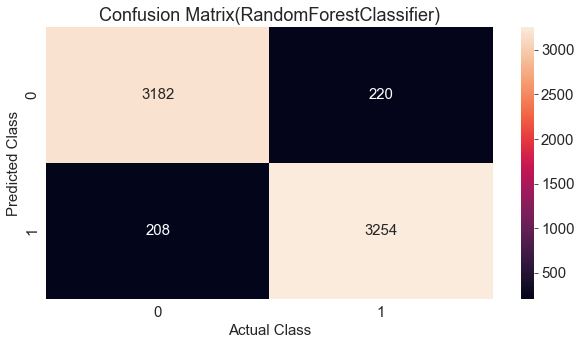

In [110]:
sns.heatmap(confusion_matrix(test_preds,y_test),annot=True,fmt='d');
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix(RandomForestClassifier)');

In [111]:
tn, fp, fn, tp = confusion_matrix(test_preds,y_test).ravel()

In [112]:
tn

3182

In [113]:
tp

3254

## **Final Model**
 *All the models that we tried above have almost same test accuracy of about 94% except knn, as well as they are able to distinguish between true positives and true negatives, almost same recall and precision scores of about 93%.*
 
 
*But as we have to process huge amount of text data we will going forward with Passive Aggressive Classifier*

In [114]:
?PassiveAggressiveClassifier

Init signature:
PassiveAggressiveClassifier(
    *,
    C=1.0,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    shuffle=True,
    verbose=0,
    loss='hinge',
    n_jobs=None,
    random_state=None,
    warm_start=False,
    class_weight=None,
    average=False,
)
Docstring:     
Passive Aggressive Classifier.

Read more in the :ref:`User Guide <passive_aggressive>`.

Parameters
----------
C : float, default=1.0
    Maximum step size (regularization). Defaults to 1.0.

fit_intercept : bool, default=True
    Whether the intercept should be estimated or not. If False, the
    data is assumed to be already centered.

max_iter : int, default=1000
    The maximum number of passes over the training data (aka epochs).
    It only impacts the behavior in the ``fit`` method, and not the
    :meth:`partial_fit` method.

    .. versionadded:: 0.19

tol : float or None, default=1e-3
    The stopping criteri

In [115]:
def C_error(md):
    model = PassiveAggressiveClassifier(C=md, random_state=42)
    model.fit(X_train, y_train)
    train_acc = 1 - model.score(X_train, y_train)
    val_acc = 1 - model.score(X_test, y_test)
    return {'C': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [116]:
np.linspace(0,0.0025,8)

array([0.        , 0.00035714, 0.00071429, 0.00107143, 0.00142857,
       0.00178571, 0.00214286, 0.0025    ])

In [117]:
errors_df = pd.DataFrame([C_error(md) for md in [0.0001, 0.0002, 0.001, 0.01, ]])

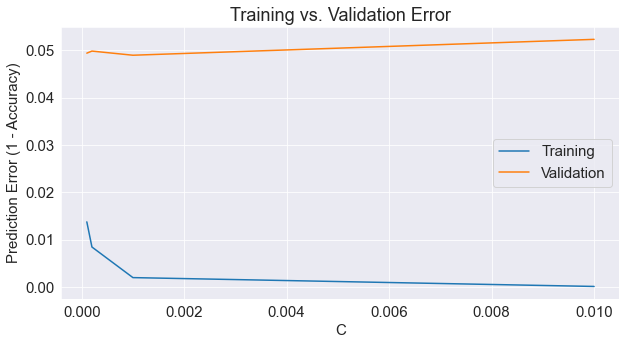

In [118]:
plt.figure()
plt.plot(errors_df['C'], errors_df['Training Error'])
plt.plot(errors_df['C'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xlabel('C')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

*We have tuned hyperparameter C which is inverse of regularization strength, lower the value higher the regularization*

In [119]:
model = PassiveAggressiveClassifier(random_state=42, C=0.001, n_jobs=-1)

In [120]:
model.fit(X_train,y_train)

PassiveAggressiveClassifier(C=0.001, n_jobs=-1, random_state=42)

In [121]:
test_preds = model.predict(X_test)

In [122]:
accuracy_score(test_preds,y_test)

0.951048951048951

In [123]:
performance = {
    'model': ['PassiveAggressiveClassifier'],
    'accuracy_score': [accuracy_score(test_preds, y_test)],
    'recall_score': [recall_score(test_preds, y_test)],
    'precision_score': [precision_score(test_preds, y_test)],
    'f1_score': [f1_score(test_preds, y_test)],
}


In [124]:
performance_df = performance_df.append(pd.DataFrame(performance),ignore_index=True)

## **Comparing Performances**

In [133]:
performance_df.drop([1],axis=0,inplace=True)

In [134]:
performance_df

,model,accuracy_score,recall_score,precision_score,f1_score
0,LogisticRegression,0.951340,0.944507,0.960276,0.952327
2,KNeighborsClassifier,0.796474,0.730727,0.946747,0.824828
3,RandomForestClassifier,0.937646,0.939919,0.936672,0.938293
4,PassiveAggressiveClassifier,0.951049,0.944224,0.959988,0.952041


**References**


> - https://www.analyticsvidhya.com/blog/2021/05/natural-language-processing-step-by-step-guide/
> - https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/#h2_6
> - https://www.analyticsvidhya.com/blog/2021/06/must-know-data-pre-processing-techniques-for-natural-language-processing/#h2_3
> - https://kavita-ganesan.com/how-to-use-countvectorizer/#.YbdyR3xBxPZ
> - https://becominghuman.ai/nlp-for-beginners-using-nltk-f58ec22005cd
> - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
> - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#examples-using-sklearn-feature-extraction-text-tfidfvectorizer
> - https://www.codementor.io/blog/text-classification-6mmol0q8oj

